In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


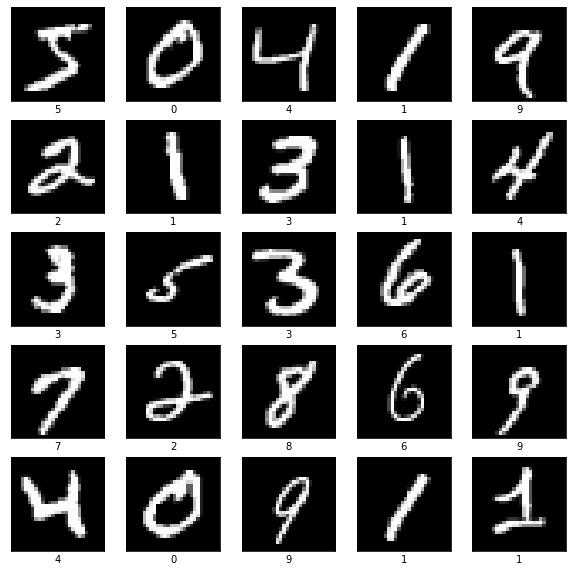

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(kernel_size=5, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [8]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 35s 3ms/step - loss: 0.2280 - accuracy: 0.9278 - val_loss: 0.0541 - val_accuracy: 0.9825
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0831 - accuracy: 0.9738 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 3/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0278 - val_accuracy: 0.9905
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0249 - val_accuracy: 0.9903
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0242 - val_accuracy

In [9]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9944


[0.01763896644115448, 0.9944000244140625]

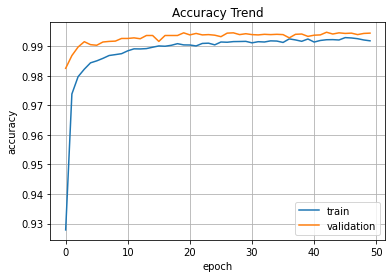

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

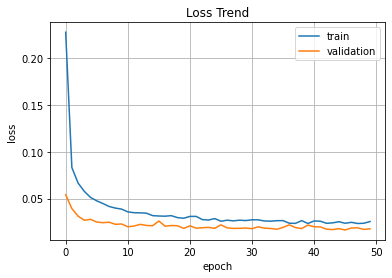

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()